In [1]:
import pandas as pd

In [ ]:
df = pd.read_csv("../../data/processed/dataset_variables_finales.csv", encoding="utf-8", delimiter=",")
df.head()

,precio,matrícula particular pagado 2024,superficie_total,simce 4to básico lectura 2022,superficie_construida,banos,longitud,simce 4to básico matemáticas 2022,distancia_metro,latitud,...,ingreso_promedio,dormitorios,extranjeros 2025 (%),pobreza multidimensional 2022 (%),pobreza por ingresos 2022 (%),hogares hacinados 2025 (%),trabajadores_información_comunicaciones_2023,trabajadores_financieras_seguros_2023,matrícula subvencionada 2024,empresas_otras_actividades_2023
0,322633576.0,6810.0,404.0,285.0,275.0,3.0,-70.678398,274.0,2554.229150,-33.345468,...,720051.66,5.0,6.4,18.6,4.3,8.8,16518.0,3273.0,4724.0,487.0
1,157180460.0,4221.0,190.0,279.0,127.0,2.0,-70.559425,268.0,2324.734493,-33.563025,...,538232.86,3.0,3.6,18.9,5.0,7.2,658.0,75.0,84429.0,1922.0
2,133544301.0,3215.0,146.0,273.0,61.0,2.0,-70.689872,258.0,11151.846959,-33.641678,...,488733.18,5.0,5.4,18.7,6.0,9.0,498.0,88.0,38599.0,843.0
3,117786861.0,769.0,145.0,273.0,82.0,2.0,-70.887450,256.0,16662.321199,-33.613778,...,591753.35,3.0,3.0,15.1,7.3,8.1,93.0,19.0,12798.0,299.0
4,153241100.0,2732.0,172.0,283.0,82.0,4.0,-70.709209,269.0,1948.472205,-33.360659,...,549642.87,4.0,13.0,17.0,5.2,8.7,861.0,367.0,33726.0,660.0


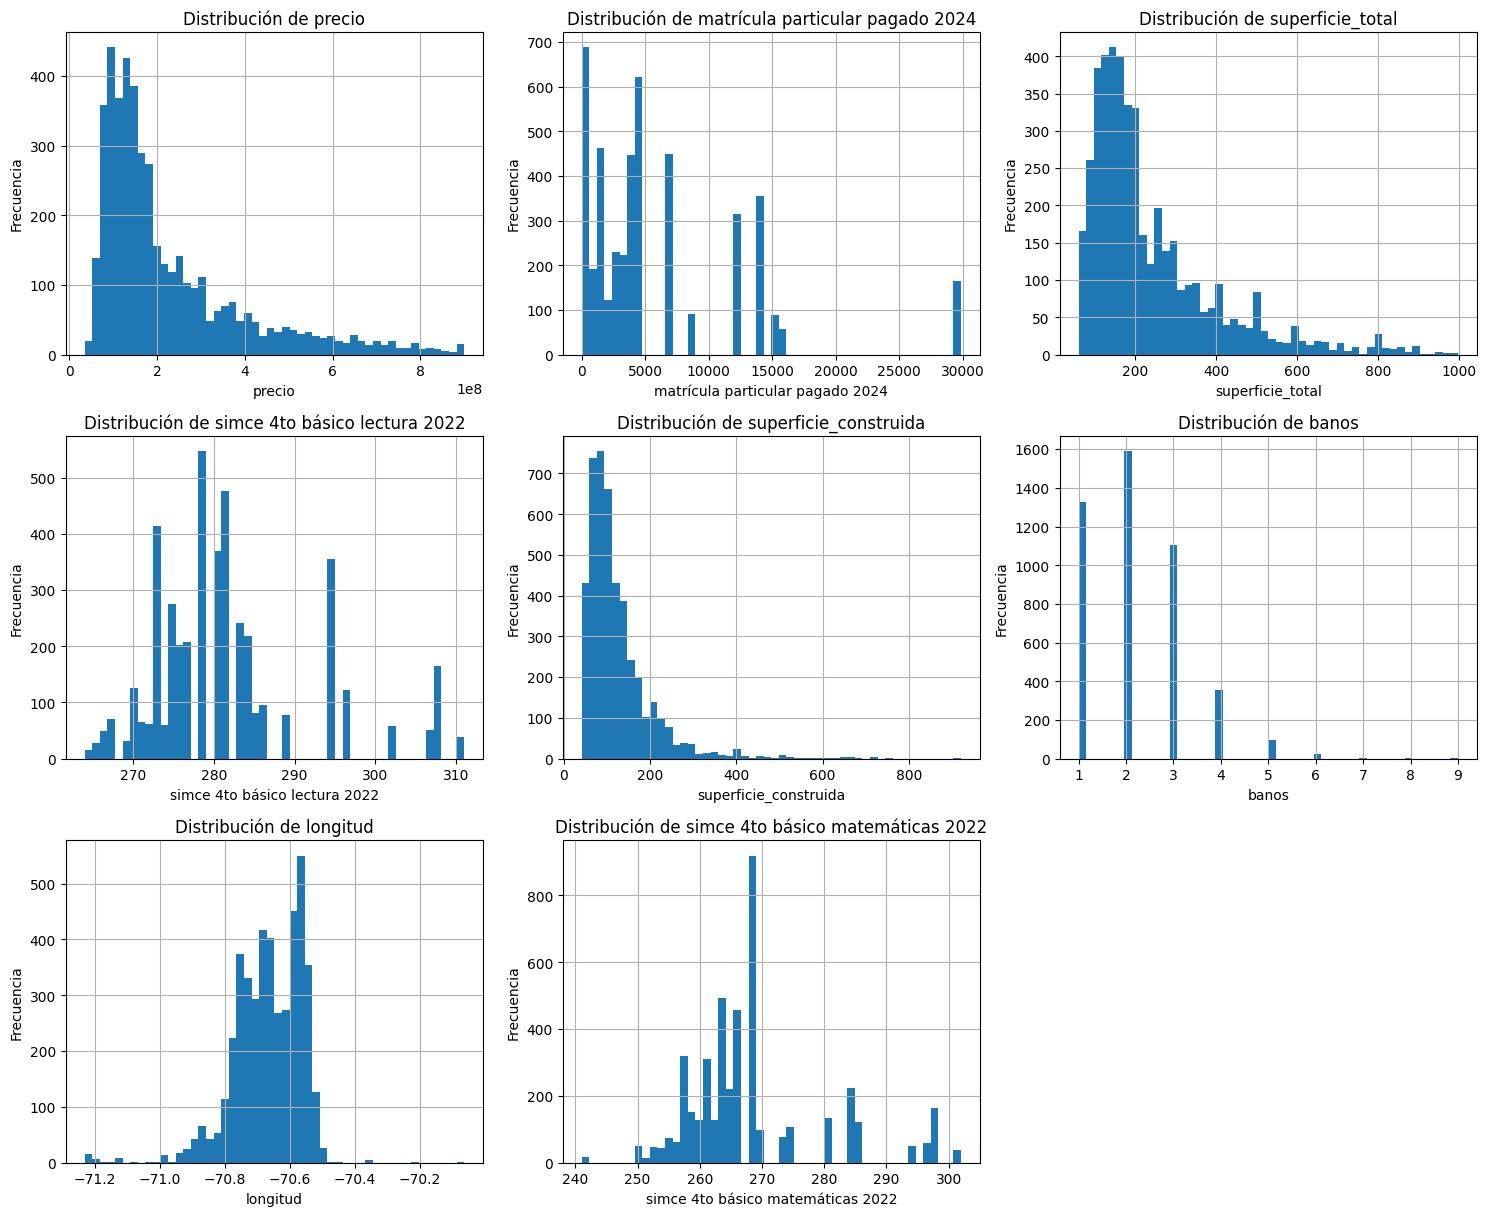

In [5]:
import matplotlib.pyplot as plt

numeric_cols = df.columns
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols[:8]):
    df[col].hist(bins=50, ax=axes[i])
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

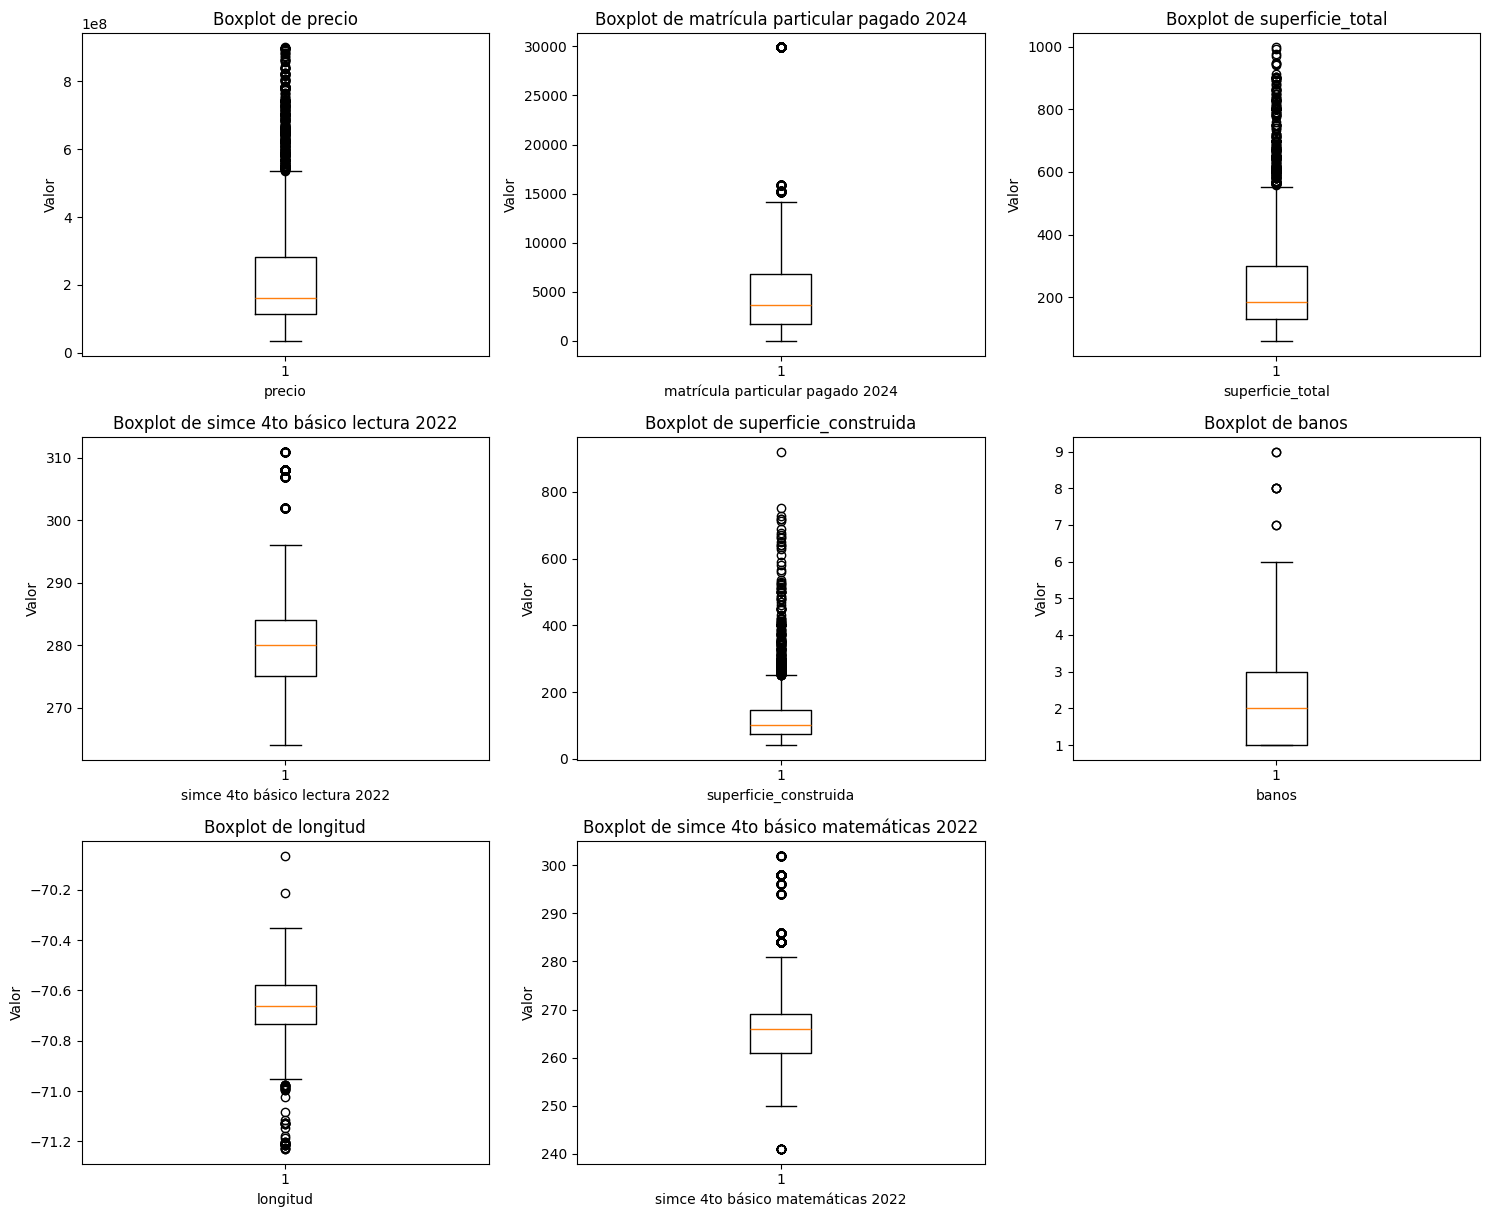

In [6]:
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include='number').columns
n_cols = 3 
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols[:8]):
    axes[i].boxplot(df[col].dropna(), vert=True)
    axes[i].set_title(f'Boxplot de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Valor')

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

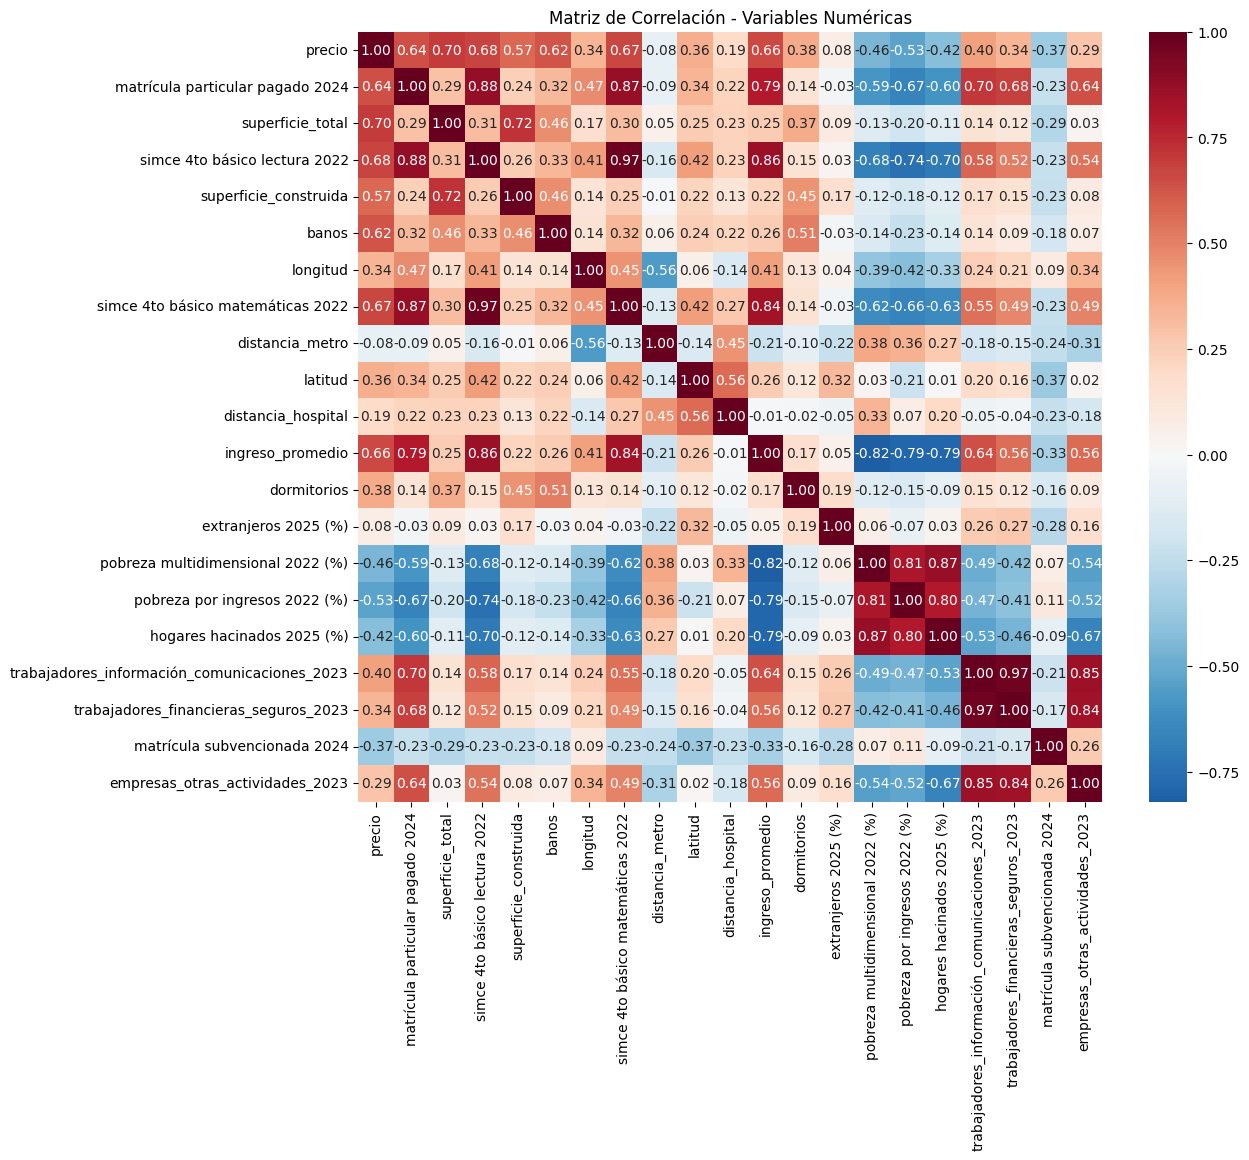

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Solo variables numéricas
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

# Visualización
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            fmt='.2f')
plt.title('Matriz de Correlación - Variables Numéricas')
plt.show()

In [9]:
print(df.columns)

Index(['precio', 'matrícula particular pagado 2024', 'superficie_total',
       'simce 4to básico lectura 2022', 'superficie_construida', 'banos',
       'longitud', 'simce 4to básico matemáticas 2022', 'distancia_metro',
       'latitud', 'distancia_hospital', 'ingreso_promedio', 'dormitorios',
       'extranjeros 2025 (%)', 'pobreza multidimensional 2022 (%)',
       'pobreza por ingresos 2022 (%)', 'hogares hacinados 2025 (%)',
       'trabajadores_información_comunicaciones_2023',
       'trabajadores_financieras_seguros_2023', 'matrícula subvencionada 2024',
       'empresas_otras_actividades_2023'],
      dtype='object')


In [10]:
variables_a_eliminar = [
    'empresas_otras_actividades_2023',
    'simce 4to básico lectura 2022',
    'distancia_metro',
    'matrícula particular pagado 2024',
    'simce 4to básico lectura 2022',
    'trabajadores_información_comunicaciones_2023',
    'simce 4to básico matemáticas 2022',
    'hogares hacinados 2025 (%)',
    'pobreza por ingresos 2022 (%)',
    'pobreza multidimensional 2022 (%)'
]

df = df.drop(variables_a_eliminar, axis=1)
df.columns

Index(['precio', 'superficie_total', 'superficie_construida', 'banos',
       'longitud', 'latitud', 'distancia_hospital', 'ingreso_promedio',
       'dormitorios', 'extranjeros 2025 (%)',
       'trabajadores_financieras_seguros_2023',
       'matrícula subvencionada 2024'],
      dtype='object')

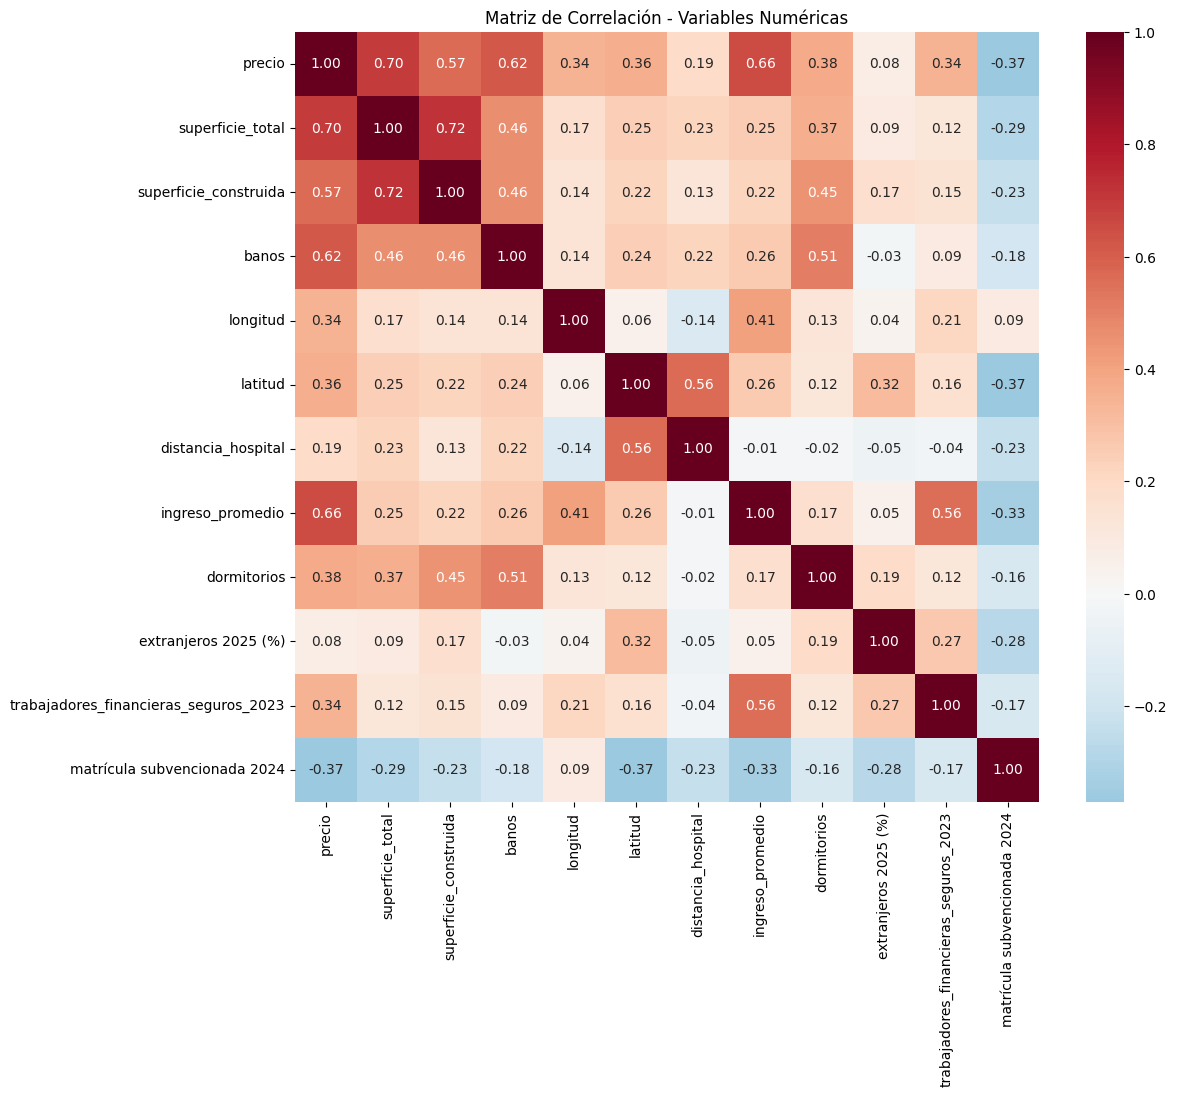

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Solo variables numéricas
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            fmt='.2f')
plt.title('Matriz de Correlación - Variables Numéricas')
plt.show()

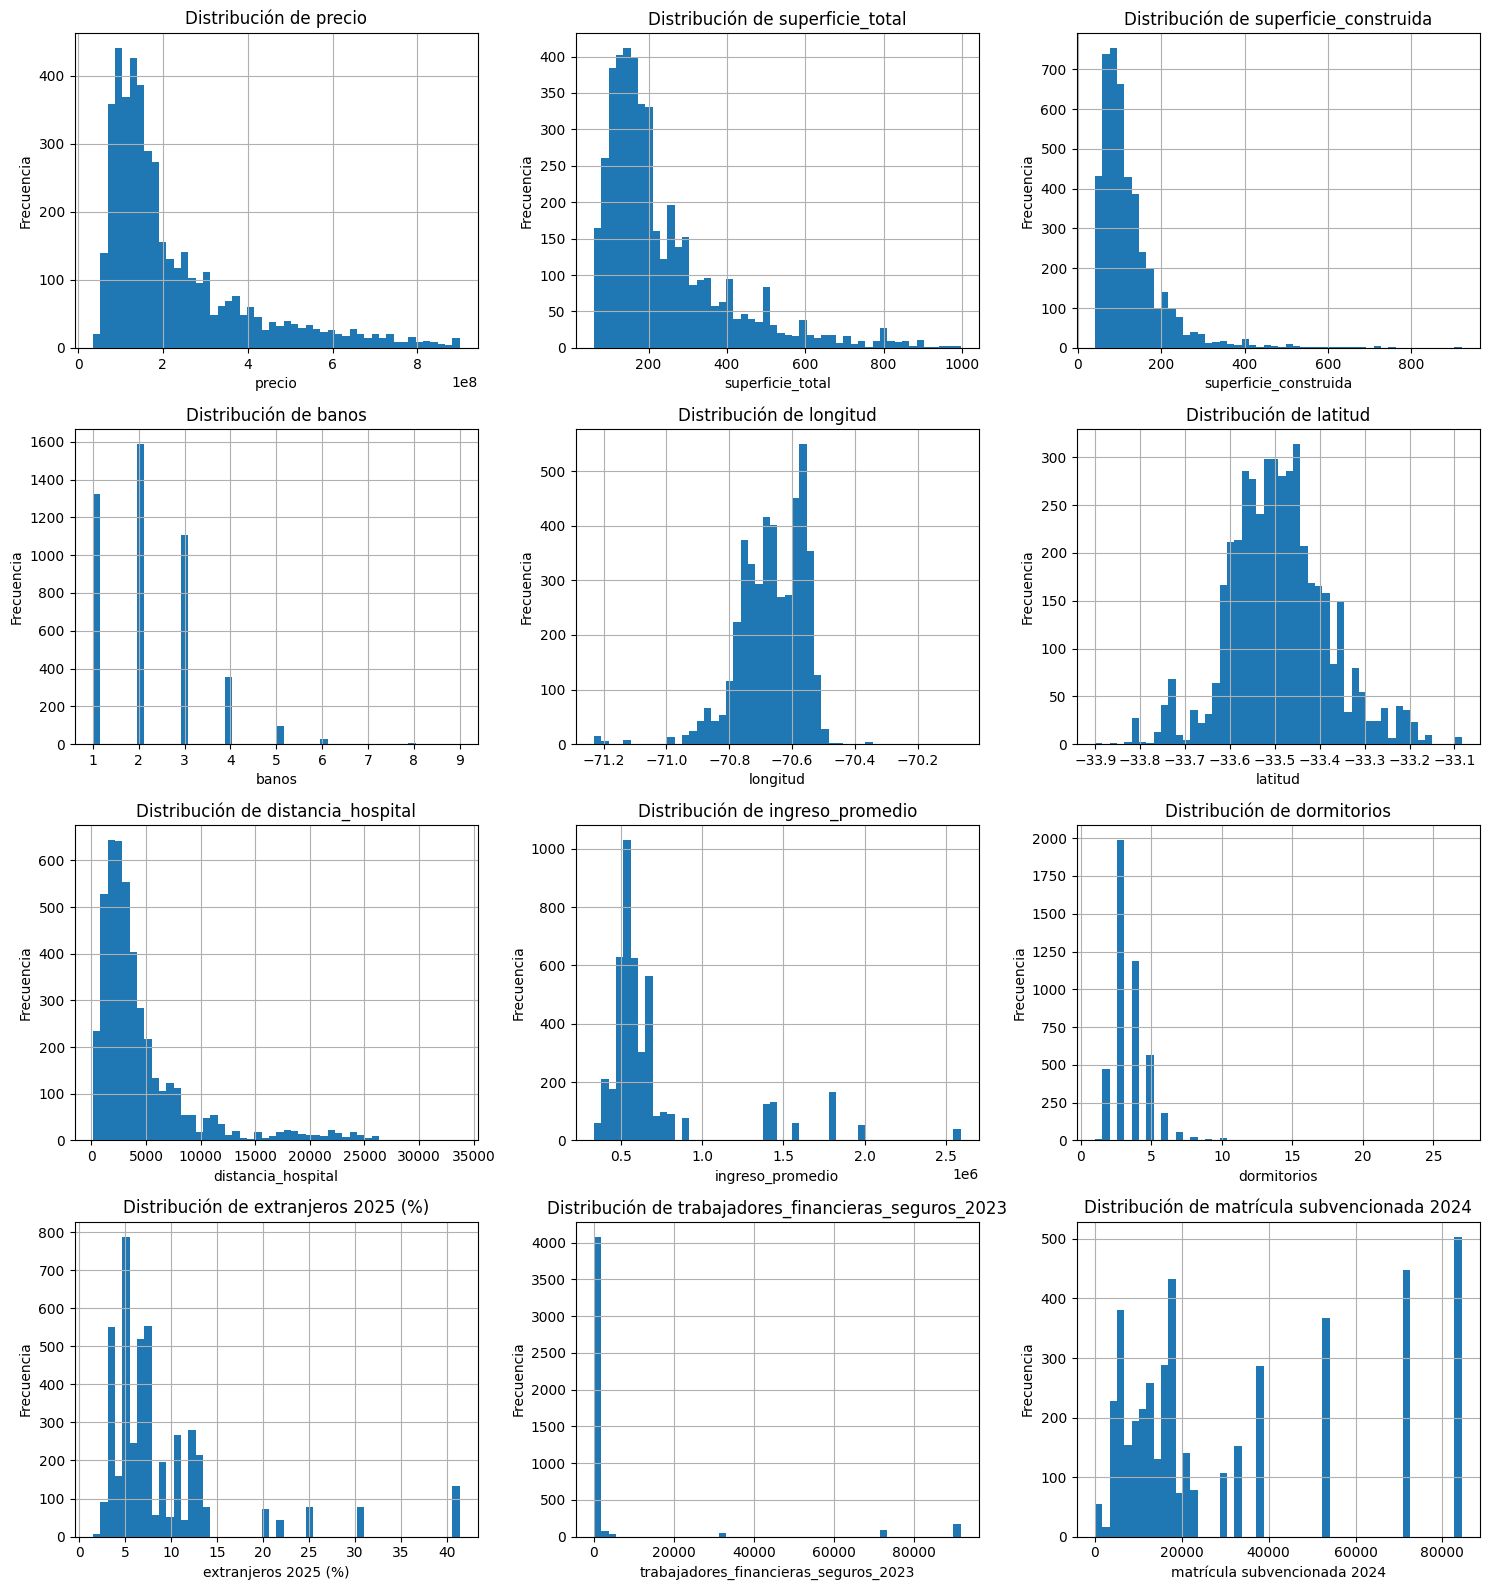

In [12]:
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include='number').columns
n_cols = 3  # Number of columns in the grid
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    df[col].hist(bins=50, ax=axes[i])
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [13]:
df = df.dropna()

In [14]:
len(df)

4508

In [15]:
df.columns

Index(['precio', 'superficie_total', 'superficie_construida', 'banos',
       'longitud', 'latitud', 'distancia_hospital', 'ingreso_promedio',
       'dormitorios', 'extranjeros 2025 (%)',
       'trabajadores_financieras_seguros_2023',
       'matrícula subvencionada 2024'],
      dtype='object')

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

print("Librerías importadas correctamente")
print(f"Versión de PyTorch: {torch.__version__}")

Librerías importadas correctamente
Versión de PyTorch: 2.5.1+cu121


In [17]:
y = df['precio']

X = df.drop(columns=['precio'])

y_binned = pd.qcut(y, q=10, duplicates='drop')
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y_binned
)

print(f"Tamaño conjunto entrenamiento: {X_train.shape}")
print(f"Tamaño conjunto prueba: {X_test.shape}")


Tamaño conjunto entrenamiento: (3606, 11)
Tamaño conjunto prueba: (902, 11)


In [18]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

print("Datos normalizados:")
print(f"X_train shape: {X_train_scaled.shape}")
print(f"X_test shape: {X_test_scaled.shape}")
print(f"y_train range: [{y_train_scaled.min():.3f}, {y_train_scaled.max():.3f}]")
print(f"y_test range: [{y_test_scaled.min():.3f}, {y_test_scaled.max():.3f}]")

Datos normalizados:
X_train shape: (3606, 11)
X_test shape: (902, 11)
y_train range: [-1.102, 3.957]
y_test range: [-1.132, 3.953]


In [19]:
X_train_tensor = torch.FloatTensor(X_train_scaled)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_train_tensor = torch.FloatTensor(y_train_scaled)
y_test_tensor = torch.FloatTensor(y_test_scaled)

print("Tensores creados:")
print(f"X_train_tensor shape: {X_train_tensor.shape}")
print(f"X_test_tensor shape: {X_test_tensor.shape}")
print(f"y_train_tensor shape: {y_train_tensor.shape}")
print(f"y_test_tensor shape: {y_test_tensor.shape}")

Tensores creados:
X_train_tensor shape: torch.Size([3606, 11])
X_test_tensor shape: torch.Size([902, 11])
y_train_tensor shape: torch.Size([3606])
y_test_tensor shape: torch.Size([902])


In [20]:
class HousePriceNN(nn.Module):
    def __init__(self, n_features):
        super(HousePriceNN, self).__init__()
        
        # Red neuronal principal
        self.network = nn.Sequential(
            # Primera capa oculta
            nn.Linear(n_features, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.3),
            
            # Segunda capa oculta
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.2),
            
            # Tercera capa oculta
            nn.Linear(64, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Dropout(0.1),
            
            # Capa de salida
            nn.Linear(32, 1)
        )
    
    def forward(self, x):
        return self.network(x)

# Crear el modelo
n_features = X_train_tensor.shape[1]
model = HousePriceNN(n_features)

print(f"Modelo creado:")
print(f"- Número de características: {n_features}")
print(f"- Número total de parámetros: {sum(p.numel() for p in model.parameters())}")
print("\nArquitectura del modelo:")
print(model)

Modelo creado:
- Número de características: 11
- Número total de parámetros: 12353

Arquitectura del modelo:
HousePriceNN(
  (network): Sequential(
    (0): Linear(in_features=11, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.2, inplace=False)
    (8): Linear(in_features=64, out_features=32, bias=True)
    (9): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): Dropout(p=0.1, inplace=False)
    (12): Linear(in_features=32, out_features=1, bias=True)
  )
)


In [21]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=10)

batch_size = 32
train_dataset = TensorDataset(X_train_tensor, y_train_tensor) 
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

print("Configuración del entrenamiento:")
print(f"Función de pérdida: {criterion}")
print(f"Optimizador: Adam con lr=0.001")
print(f"Batch size: {batch_size}")
print(f"Número de batches por época: {len(train_loader)}")

Configuración del entrenamiento:
Función de pérdida: MSELoss()
Optimizador: Adam con lr=0.001
Batch size: 32
Número de batches por época: 113


In [22]:
def train_model(model, train_loader, criterion, optimizer, scheduler,
                X_test, y_test, num_epochs=100):
    train_losses = []
    val_losses = []
    
    for epoch in range(num_epochs):
        # Entrenamiento
        model.train()
        train_loss = 0.0
        
        for batch_x, batch_y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_x).squeeze()
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        
        # Validación
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_test).squeeze()
            val_loss = criterion(val_outputs, y_test).item()
        
        # Guardar pérdidas
        train_losses.append(train_loss / len(train_loader))
        val_losses.append(val_loss)
        
        # Actualizar learning rate
        scheduler.step(val_loss)
        
        # Imprimir progreso cada 10 épocas
        if (epoch + 1) % 10 == 0:
            print(f'Época [{epoch+1}/{num_epochs}], '
                  f'Train Loss: {train_losses[-1]:.4f}, '
                  f'Val Loss: {val_losses[-1]:.4f}')
    
    return train_losses, val_losses

print("Función de entrenamiento definida")

Función de entrenamiento definida


In [23]:
print("Iniciando entrenamiento...")
train_losses, val_losses = train_model(
    model, train_loader, criterion, optimizer, scheduler,
    X_test_tensor, y_test_tensor, num_epochs=100
)

print("\n¡Entrenamiento completado!")

Iniciando entrenamiento...
Época [10/100], Train Loss: 0.2362, Val Loss: 0.1471
Época [20/100], Train Loss: 0.2201, Val Loss: 0.1399
Época [30/100], Train Loss: 0.2052, Val Loss: 0.1445
Época [40/100], Train Loss: 0.1911, Val Loss: 0.1404
Época [50/100], Train Loss: 0.1844, Val Loss: 0.1377
Época [60/100], Train Loss: 0.1942, Val Loss: 0.1393
Época [70/100], Train Loss: 0.1722, Val Loss: 0.1354
Época [80/100], Train Loss: 0.1723, Val Loss: 0.1382
Época [90/100], Train Loss: 0.1678, Val Loss: 0.1387
Época [100/100], Train Loss: 0.1685, Val Loss: 0.1379

¡Entrenamiento completado!


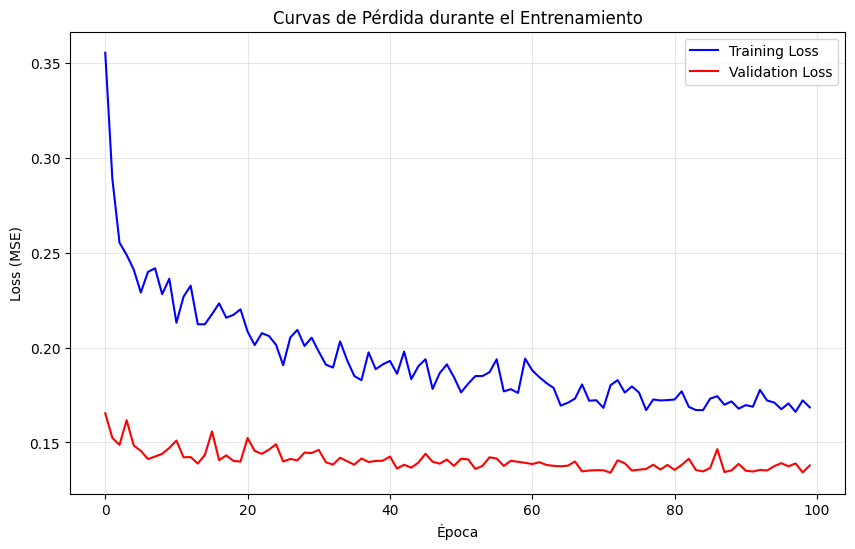

Pérdida final de entrenamiento: 0.1685
Pérdida final de validación: 0.1379


In [24]:
# Visualizar las curvas de pérdida
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss', color='blue')
plt.plot(val_losses, label='Validation Loss', color='red')
plt.title('Curvas de Pérdida durante el Entrenamiento')
plt.xlabel('Época')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Pérdida final de entrenamiento: {train_losses[-1]:.4f}")
print(f"Pérdida final de validación: {val_losses[-1]:.4f}")

In [25]:
model.eval()
with torch.no_grad():
    # Predicciones en escala normalizada
    train_pred_scaled = model(X_train_tensor).squeeze().numpy()
    test_pred_scaled = model(X_test_tensor).squeeze().numpy()
    
    # Desnormalizar las predicciones para obtener valores reales
    train_pred = scaler_y.inverse_transform(train_pred_scaled.reshape(-1, 1)).flatten()
    test_pred = scaler_y.inverse_transform(test_pred_scaled.reshape(-1, 1)).flatten()

# Función para calcular MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

# Función para calcular MAE porcentual
def mae_percentage(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mean_true = np.mean(y_true)
    return (mae / mean_true) * 100

# Métricas en conjunto de entrenamiento
train_mse = mean_squared_error(y_train, train_pred)
train_mae = mean_absolute_error(y_train, train_pred)
train_mape = mean_absolute_percentage_error(y_train, train_pred)
train_mae_pct = mae_percentage(y_train, train_pred)
train_r2 = r2_score(y_train, train_pred)

# Métricas en conjunto de prueba
test_mse = mean_squared_error(y_test, test_pred)
test_mae = mean_absolute_error(y_test, test_pred)
test_mape = mean_absolute_percentage_error(y_test, test_pred)
test_mae_pct = mae_percentage(y_test, test_pred)
test_r2 = r2_score(y_test, test_pred)

print("=== MÉTRICAS DE EVALUACIÓN MLP ===")
print("\nConjunto de Entrenamiento:")
print(f"RMSE: ${np.sqrt(train_mse):,.0f}")
print(f"MAE: ${train_mae:,.0f}")
print(f"MAPE: {train_mape:.2f}%")
print(f"MAE Porcentual: {train_mae_pct:.2f}%")
print(f"R² Score: {train_r2:.4f}")

print("\nConjunto de Prueba:")
print(f"RMSE: ${np.sqrt(test_mse):,.0f}")
print(f"MAE: ${test_mae:,.0f}")
print(f"MAPE: {test_mape:.2f}%")
print(f"MAE Porcentual: {test_mae_pct:.2f}%")
print(f"R² Score: {test_r2:.4f}")

=== MÉTRICAS DE EVALUACIÓN MLP ===

Conjunto de Entrenamiento:
RMSE: $56,445,981
MAE: $37,360,919
MAPE: 18.51%
MAE Porcentual: 16.44%
R² Score: 0.8896

Conjunto de Prueba:
RMSE: $63,085,807
MAE: $39,808,240
MAPE: 20.20%
MAE Porcentual: 17.61%
R² Score: 0.8589


precio                                   1.000000
superficie_total                         0.697513
ingreso_promedio                         0.655125
banos                                    0.624088
superficie_construida                    0.567518
dormitorios                              0.380098
latitud                                  0.364576
longitud                                 0.343198
trabajadores_financieras_seguros_2023    0.342293
distancia_hospital                       0.194049
extranjeros 2025 (%)                     0.075341
matrícula subvencionada 2024            -0.365451
Name: precio, dtype: float64
Variables con fecha 2024-2025:
['extranjeros 2025 (%)', 'matrícula subvencionada 2024']


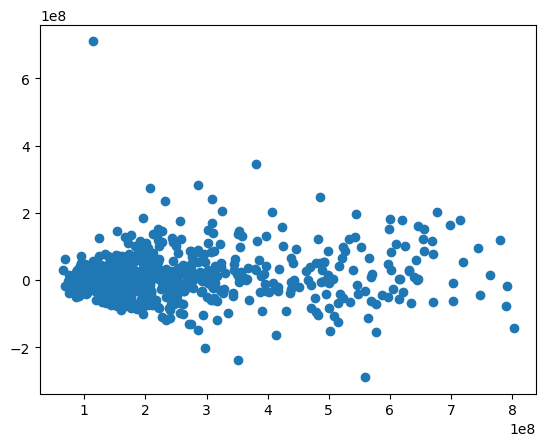

In [26]:
print(df.corr()['precio'].sort_values(ascending=False))

print("Variables con fecha 2024-2025:")
print([col for col in df.columns if '2024' in col or '2025' in col])

residuales = y_test - test_pred
plt.scatter(test_pred, residuales)

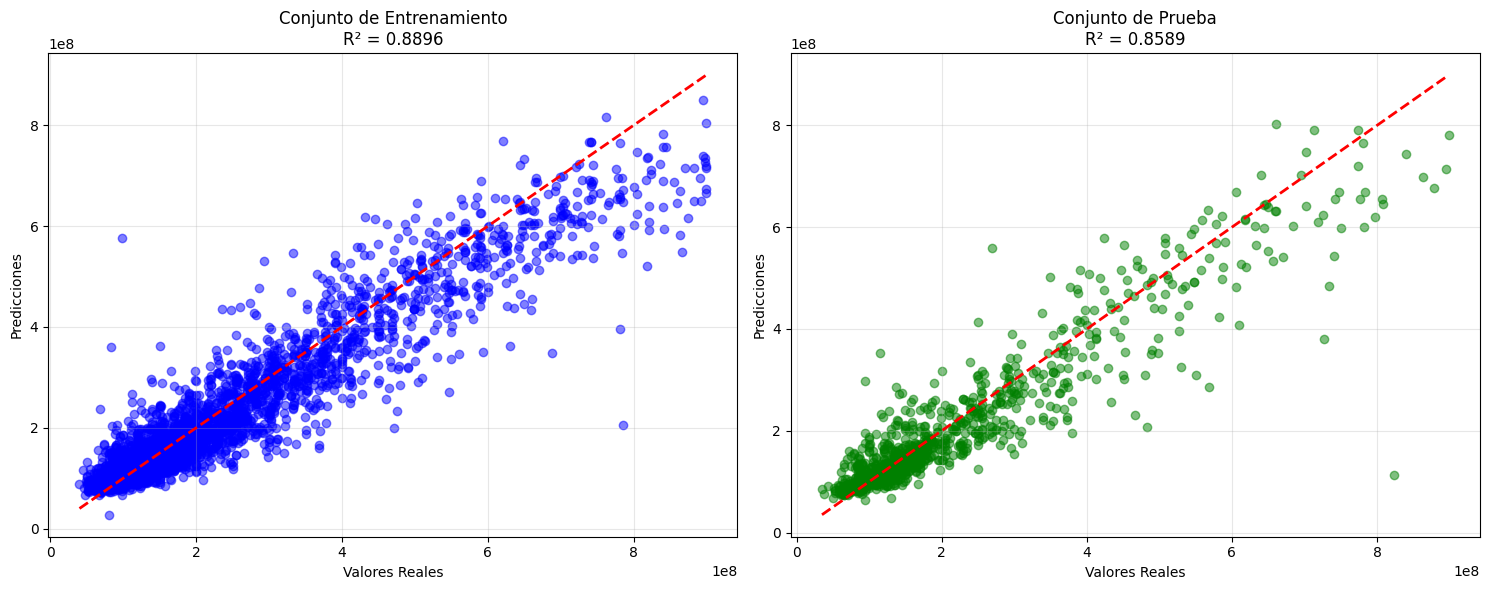

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.scatter(y_train, train_pred, alpha=0.5, color='blue')
ax1.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
ax1.set_xlabel('Valores Reales')
ax1.set_ylabel('Predicciones')
ax1.set_title(f'Conjunto de Entrenamiento\nR² = {train_r2:.4f}')
ax1.grid(True, alpha=0.3)

ax2.scatter(y_test, test_pred, alpha=0.5, color='green')
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax2.set_xlabel('Valores Reales')
ax2.set_ylabel('Predicciones')
ax2.set_title(f'Conjunto de Prueba\nR² = {test_r2:.4f}')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [28]:
from sklearn.model_selection import KFold

def train_model_single_fold(model, train_loader, criterion, optimizer, scheduler,
                           X_val, y_val, num_epochs=100):
    train_losses = []
    val_losses = []
    
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        
        for batch_x, batch_y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_x).squeeze()
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val).squeeze()
            val_loss = criterion(val_outputs, y_val).item()

        train_losses.append(train_loss / len(train_loader))
        val_losses.append(val_loss)
        scheduler.step(val_loss)
    
    return train_losses, val_losses

def kfold_cross_validation(X_data, y_data, n_splits=5, num_epochs=100, batch_size=32):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    fold_train_losses = []
    fold_val_losses = []
    fold_metrics = []
    
    print(f"Iniciando {n_splits}-Fold Cross Validation...")
    print("="*60)
    
    for fold, (train_idx, val_idx) in enumerate(kfold.split(X_data)):
        print(f"\nFOLD {fold + 1}/{n_splits}")
        print("-" * 30)
        
        X_train_fold = X_data[train_idx]
        X_val_fold = X_data[val_idx]
        y_train_fold = y_data[train_idx]
        y_val_fold = y_data[val_idx]
        
        scaler_X_fold = StandardScaler()
        scaler_y_fold = StandardScaler()
        
        X_train_fold_scaled = scaler_X_fold.fit_transform(X_train_fold)
        X_val_fold_scaled = scaler_X_fold.transform(X_val_fold)
        
        y_train_fold_scaled = scaler_y_fold.fit_transform(y_train_fold.reshape(-1, 1)).flatten()
        y_val_fold_scaled = scaler_y_fold.transform(y_val_fold.reshape(-1, 1)).flatten()
        
        X_train_fold_tensor = torch.FloatTensor(X_train_fold_scaled)
        X_val_fold_tensor = torch.FloatTensor(X_val_fold_scaled)
        y_train_fold_tensor = torch.FloatTensor(y_train_fold_scaled)
        y_val_fold_tensor = torch.FloatTensor(y_val_fold_scaled)
        
        train_dataset_fold = TensorDataset(X_train_fold_tensor, y_train_fold_tensor)
        train_loader_fold = DataLoader(train_dataset_fold, batch_size=batch_size, shuffle=True)
        
        model_fold = HousePriceNN(X_train_fold_tensor.shape[1])
        criterion_fold = nn.MSELoss()
        optimizer_fold = optim.Adam(model_fold.parameters(), lr=0.001, weight_decay=1e-4)
        scheduler_fold = optim.lr_scheduler.ReduceLROnPlateau(optimizer_fold, mode='min', factor=0.5, patience=10)
        
        train_losses, val_losses = train_model_single_fold(
            model_fold, train_loader_fold, criterion_fold, optimizer_fold, scheduler_fold,
            X_val_fold_tensor, y_val_fold_tensor, num_epochs=num_epochs
        )
        
        model_fold.eval()
        with torch.no_grad():
            val_pred_scaled = model_fold(X_val_fold_tensor).squeeze().numpy()
            val_pred = scaler_y_fold.inverse_transform(val_pred_scaled.reshape(-1, 1)).flatten()
        
        fold_mse = mean_squared_error(y_val_fold, val_pred)
        fold_mae = mean_absolute_error(y_val_fold, val_pred)
        fold_r2 = r2_score(y_val_fold, val_pred)
        fold_rmse = np.sqrt(fold_mse)
        
        fold_train_losses.append(train_losses)
        fold_val_losses.append(val_losses)
        fold_metrics.append({
            'fold': fold + 1,
            'mse': fold_mse,
            'mae': fold_mae,
            'rmse': fold_rmse,
            'r2': fold_r2,
            'final_train_loss': train_losses[-1],
            'final_val_loss': val_losses[-1]
        })
        
        print(f"Fold {fold + 1} - RMSE: ${fold_rmse:,.0f}, MAE: ${fold_mae:,.0f}, R²: {fold_r2:.4f}")
    
    avg_mse = np.mean([m['mse'] for m in fold_metrics])
    avg_mae = np.mean([m['mae'] for m in fold_metrics])
    avg_rmse = np.mean([m['rmse'] for m in fold_metrics])
    avg_r2 = np.mean([m['r2'] for m in fold_metrics])
    
    std_mse = np.std([m['mse'] for m in fold_metrics])
    std_mae = np.std([m['mae'] for m in fold_metrics])
    std_rmse = np.std([m['rmse'] for m in fold_metrics])
    std_r2 = np.std([m['r2'] for m in fold_metrics])
    
    print("\n" + "="*60)
    print("RESULTADOS FINALES K-FOLD CROSS VALIDATION")
    print("="*60)
    print(f"RMSE: ${avg_rmse:,.0f} (±${std_rmse:,.0f})")
    print(f"MAE: ${avg_mae:,.0f} (±${std_mae:,.0f})")
    print(f"R² Score: {avg_r2:.4f} (±{std_r2:.4f})")
    
    return fold_metrics, fold_train_losses, fold_val_losses

print("Preparando datos para K-Fold Cross Validation...")

X_full = X.values
y_full = y.values  

cv_results, cv_train_losses, cv_val_losses = kfold_cross_validation(
    X_full, y_full, 
    n_splits=5, 
    num_epochs=100, 
    batch_size=32
)

Preparando datos para K-Fold Cross Validation...
Iniciando 5-Fold Cross Validation...

FOLD 1/5
------------------------------
Fold 1 - RMSE: $56,264,375, MAE: $37,767,070, R²: 0.8795

FOLD 2/5
------------------------------
Fold 2 - RMSE: $62,205,814, MAE: $40,179,284, R²: 0.8639

FOLD 3/5
------------------------------
Fold 3 - RMSE: $72,061,372, MAE: $43,930,644, R²: 0.8242

FOLD 4/5
------------------------------
Fold 4 - RMSE: $66,123,467, MAE: $43,688,889, R²: 0.8579

FOLD 5/5
------------------------------
Fold 5 - RMSE: $64,154,897, MAE: $41,946,797, R²: 0.8561

RESULTADOS FINALES K-FOLD CROSS VALIDATION
RMSE: $64,161,985 (±$5,146,778)
MAE: $41,502,537 (±$2,305,555)
R² Score: 0.8563 (±0.0181)


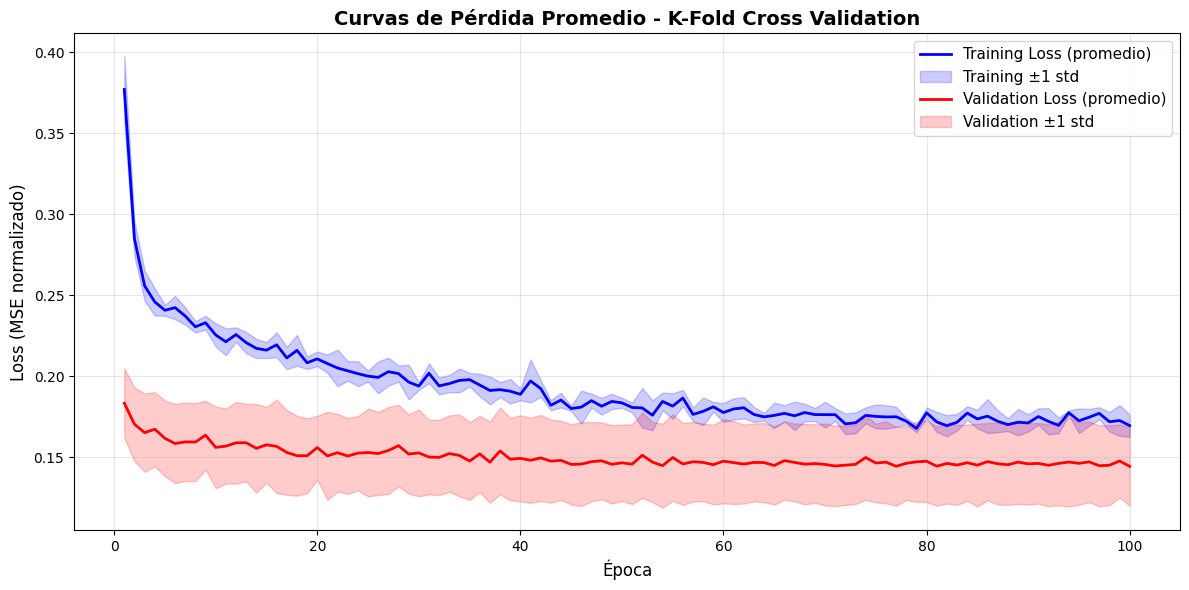

Pérdida final promedio - Training: 0.1696 (±0.0069)
Pérdida final promedio - Validation: 0.1445 (±0.0243)


In [34]:
plt.figure(figsize=(12, 6))

max_epochs = min(len(losses) for losses in cv_train_losses)
epochs = range(1, max_epochs + 1)

avg_train_losses = []
std_train_losses = []
avg_val_losses = []
std_val_losses = []

for epoch in range(max_epochs):
    train_epoch_losses = [losses[epoch] for losses in cv_train_losses if epoch < len(losses)]
    val_epoch_losses = [losses[epoch] for losses in cv_val_losses if epoch < len(losses)]
    
    avg_train_losses.append(np.mean(train_epoch_losses))
    std_train_losses.append(np.std(train_epoch_losses))
    avg_val_losses.append(np.mean(val_epoch_losses))
    std_val_losses.append(np.std(val_epoch_losses))

avg_train_losses = np.array(avg_train_losses)
std_train_losses = np.array(std_train_losses)
avg_val_losses = np.array(avg_val_losses)
std_val_losses = np.array(std_val_losses)

plt.plot(epochs, avg_train_losses, 'b-', label='Training Loss (promedio)', linewidth=2)
plt.fill_between(epochs, avg_train_losses - std_train_losses, avg_train_losses + std_train_losses, 
                 alpha=0.2, color='blue', label='Training ±1 std')
plt.plot(epochs, avg_val_losses, 'r-', label='Validation Loss (promedio)', linewidth=2)
plt.fill_between(epochs, avg_val_losses - std_val_losses, avg_val_losses + std_val_losses, 
                 alpha=0.2, color='red', label='Validation ±1 std')

plt.title('Curvas de Pérdida Promedio - K-Fold Cross Validation', fontsize=14, fontweight='bold')
plt.xlabel('Época', fontsize=12)
plt.ylabel('Loss (MSE normalizado)', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Pérdida final promedio - Training: {avg_train_losses[-1]:.4f} (±{std_train_losses[-1]:.4f})")
print(f"Pérdida final promedio - Validation: {avg_val_losses[-1]:.4f} (±{std_val_losses[-1]:.4f})")

In [30]:
import numpy as np
import torch
from sklearn.metrics import r2_score

def compare_with_without_hospital(X_train_scaled, X_test_scaled, y_train_tensor, y_test_tensor, 
                                 model, model_class, feature_names):
    """
    Compara el rendimiento del modelo con y sin distancia_hospital
    """
    # Encontrar índice de distancia_hospital
    hospital_idx = None
    for i, name in enumerate(feature_names):
        if 'distancia_hospital' in name.lower():
            hospital_idx = i
            break
    
    if hospital_idx is None:
        print("No se encontró la variable distancia_hospital")
        return
    
    print(f"Índice de distancia_hospital: {hospital_idx}")
    
    # Datos SIN distancia_hospital
    X_train_no_hospital = np.delete(X_train_scaled, hospital_idx, axis=1)
    X_test_no_hospital = np.delete(X_test_scaled, hospital_idx, axis=1)
    
    X_train_no_hospital_tensor = torch.FloatTensor(X_train_no_hospital)
    X_test_no_hospital_tensor = torch.FloatTensor(X_test_no_hospital)
    
    # Entrenar modelo SIN distancia_hospital
    model_no_hospital = model_class(X_train_no_hospital.shape[1])
    
    # Configuración de entrenamiento (simplificada)
    criterion = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(model_no_hospital.parameters(), lr=0.001, weight_decay=1e-4)
    
    # Entrenamiento rápido
    model_no_hospital.train()
    for epoch in range(50):  # Menos épocas para comparación rápida
        optimizer.zero_grad()
        outputs = model_no_hospital(X_train_no_hospital_tensor).squeeze()
        loss = criterion(outputs, y_train_tensor)
        loss.backward()
        optimizer.step()
    
    # Evaluación modelo SIN hospital
    model_no_hospital.eval()
    with torch.no_grad():
        pred_no_hospital = model_no_hospital(X_test_no_hospital_tensor).squeeze()
        r2_no_hospital = r2_score(y_test_tensor.numpy(), pred_no_hospital.numpy())
    
    # Evaluación modelo CON hospital (tu modelo entrenado)
    model.eval()
    with torch.no_grad():
        pred_with_hospital = model(torch.FloatTensor(X_test_scaled)).squeeze()
        r2_with_hospital = r2_score(y_test_tensor.numpy(), pred_with_hospital.numpy())
    
    print(f"\n=== COMPARACIÓN CON/SIN DISTANCIA_HOSPITAL ===")
    print(f"R² CON distancia_hospital:    {r2_with_hospital:.4f}")
    print(f"R² SIN distancia_hospital:    {r2_no_hospital:.4f}")
    print(f"Diferencia:                   {r2_with_hospital - r2_no_hospital:.4f}")
    
    if r2_with_hospital > r2_no_hospital:
        print("✅ La variable distancia_hospital MEJORA el modelo")
    else:
        print("❌ La variable distancia_hospital NO mejora el modelo")
    
    return r2_with_hospital, r2_no_hospital

In [31]:
# Obtener nombres de características
feature_names = X.columns.tolist()

# Ejecutar SOLO el análisis de importancia
r2_con, r2_sin = compare_with_without_hospital(
    X_train_scaled, X_test_scaled, y_train_tensor, y_test_tensor,
    model, HousePriceNN, feature_names
)

Índice de distancia_hospital: 5

=== COMPARACIÓN CON/SIN DISTANCIA_HOSPITAL ===
R² CON distancia_hospital:    0.8589
R² SIN distancia_hospital:    0.8350
Diferencia:                   0.0239
✅ La variable distancia_hospital MEJORA el modelo


In [32]:
import numpy as np
import torch
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

def hospital_cv_comparison(X_scaled, y_tensor, model_class, feature_names, cv_folds=5, epochs=50):

    hospital_idx = None
    for i, name in enumerate(feature_names):
        if 'distancia_hospital' in name.lower():
            hospital_idx = i
            break
    
    if hospital_idx is None:
        print("No se encontró la variable distancia_hospital")
        return
    
    print(f"Índice de distancia_hospital: {hospital_idx}")
    print(f"Ejecutando {cv_folds}-Fold Cross Validation...")
    
    # Preparar datos sin hospital
    X_no_hospital = np.delete(X_scaled, hospital_idx, axis=1)
    
    # Convertir a numpy si es tensor
    if isinstance(y_tensor, torch.Tensor):
        y_numpy = y_tensor.numpy()
    else:
        y_numpy = y_tensor
    
    # Cross-validation
    kfold = KFold(n_splits=cv_folds, shuffle=True, random_state=42)
    
    # Almacenar resultados
    r2_with_hospital = []
    r2_without_hospital = []
    
    for fold, (train_idx, val_idx) in enumerate(kfold.split(X_scaled)):
        print(f"  Procesando Fold {fold + 1}/{cv_folds}...", end=" ")
        
        # Dividir datos
        X_train_fold = X_scaled[train_idx]
        X_val_fold = X_scaled[val_idx]
        y_train_fold = y_numpy[train_idx]
        y_val_fold = y_numpy[val_idx]
        
        X_train_no_hosp_fold = X_no_hospital[train_idx]
        X_val_no_hosp_fold = X_no_hospital[val_idx]
        
        # Convertir a tensores
        X_train_tensor = torch.FloatTensor(X_train_fold)
        X_val_tensor = torch.FloatTensor(X_val_fold)
        y_train_tensor = torch.FloatTensor(y_train_fold)
        y_val_tensor = torch.FloatTensor(y_val_fold)
        
        X_train_no_hosp_tensor = torch.FloatTensor(X_train_no_hosp_fold)
        X_val_no_hosp_tensor = torch.FloatTensor(X_val_no_hosp_fold)
        
        # ============= MODELO CON HOSPITAL =============
        model_with = model_class(X_scaled.shape[1])
        criterion = torch.nn.MSELoss()
        optimizer = torch.optim.Adam(model_with.parameters(), lr=0.001, weight_decay=1e-4)
        
        # Entrenar
        model_with.train()
        for epoch in range(epochs):
            optimizer.zero_grad()
            outputs = model_with(X_train_tensor).squeeze()
            loss = criterion(outputs, y_train_tensor)
            loss.backward()
            optimizer.step()
        
        # Evaluar
        model_with.eval()
        with torch.no_grad():
            pred_with = model_with(X_val_tensor).squeeze()
            r2_with = r2_score(y_val_fold, pred_with.numpy())
        
        # ============= MODELO SIN HOSPITAL =============
        model_without = model_class(X_no_hospital.shape[1])
        optimizer = torch.optim.Adam(model_without.parameters(), lr=0.001, weight_decay=1e-4)
        
        # Entrenar
        model_without.train()
        for epoch in range(epochs):
            optimizer.zero_grad()
            outputs = model_without(X_train_no_hosp_tensor).squeeze()
            loss = criterion(outputs, y_train_tensor)
            loss.backward()
            optimizer.step()
        
        # Evaluar
        model_without.eval()
        with torch.no_grad():
            pred_without = model_without(X_val_no_hosp_tensor).squeeze()
            r2_without = r2_score(y_val_fold, pred_without.numpy())
        
        # Guardar resultados
        r2_with_hospital.append(r2_with)
        r2_without_hospital.append(r2_without)
        
        print(f"R² con: {r2_with:.4f}, sin: {r2_without:.4f}, diff: {r2_with - r2_without:.4f}")
    
    # Convertir a arrays
    r2_with_hospital = np.array(r2_with_hospital)
    r2_without_hospital = np.array(r2_without_hospital)
    differences = r2_with_hospital - r2_without_hospital
    
    # Estadísticas
    print(f"\n{'='*60}")
    print(f"RESULTADOS CROSS-VALIDATION ({cv_folds} folds)")
    print(f"{'='*60}")
    print(f"R² CON distancia_hospital:")
    print(f"  Media: {r2_with_hospital.mean():.4f} ± {r2_with_hospital.std():.4f}")
    print(f"  Rango: [{r2_with_hospital.min():.4f}, {r2_with_hospital.max():.4f}]")
    
    print(f"\nR² SIN distancia_hospital:")
    print(f"  Media: {r2_without_hospital.mean():.4f} ± {r2_without_hospital.std():.4f}")
    print(f"  Rango: [{r2_without_hospital.min():.4f}, {r2_without_hospital.max():.4f}]")
    
    print(f"\nDIFERENCIA (Con - Sin):")
    print(f"  Media: {differences.mean():.4f} ± {differences.std():.4f}")
    print(f"  Rango: [{differences.min():.4f}, {differences.max():.4f}]")
    
    # Test estadístico simple
    mejoras_positivas = np.sum(differences > 0)
    print(f"\nMejoras positivas: {mejoras_positivas}/{cv_folds} folds ({mejoras_positivas/cv_folds*100:.1f}%)")
    
    if differences.mean() > 0 and mejoras_positivas >= cv_folds * 0.6:
        print("✅ La variable distancia_hospital MEJORA consistentemente el modelo")
    else:
        print("❌ La variable distancia_hospital NO mejora consistentemente el modelo")
    
    # Gráfico opcional
    plot_results = True
    if plot_results:
        plt.figure(figsize=(12, 5))
        
        # Subplot 1: Comparación por fold
        plt.subplot(1, 2, 1)
        x_pos = np.arange(cv_folds)
        width = 0.35
        
        plt.bar(x_pos - width/2, r2_with_hospital, width, label='Con hospital', alpha=0.7, color='blue')
        plt.bar(x_pos + width/2, r2_without_hospital, width, label='Sin hospital', alpha=0.7, color='red')
        
        plt.xlabel('Fold')
        plt.ylabel('R²')
        plt.title('R² por Fold: Con vs Sin distancia_hospital')
        plt.legend()
        plt.xticks(x_pos, [f'Fold {i+1}' for i in range(cv_folds)])
        plt.grid(True, alpha=0.3)
        
        # Subplot 2: Diferencias
        plt.subplot(1, 2, 2)
        plt.bar(x_pos, differences, alpha=0.7, color='green' if differences.mean() > 0 else 'orange')
        plt.axhline(y=0, color='black', linestyle='-', alpha=0.5)
        plt.axhline(y=differences.mean(), color='red', linestyle='--', alpha=0.7, 
                   label=f'Media: {differences.mean():.4f}')
        
        plt.xlabel('Fold')
        plt.ylabel('Diferencia R² (Con - Sin)')
        plt.title('Mejora por Fold')
        plt.legend()
        plt.xticks(x_pos, [f'Fold {i+1}' for i in range(cv_folds)])
        plt.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
    
    return {
        'r2_with_hospital': r2_with_hospital,
        'r2_without_hospital': r2_without_hospital,
        'differences': differences,
        'mean_improvement': differences.mean(),
        'std_improvement': differences.std(),
        'positive_improvements': mejoras_positivas
    }


Índice de distancia_hospital: 5
Ejecutando 5-Fold Cross Validation...
  Procesando Fold 1/5... R² con: 0.8194, sin: 0.8210, diff: -0.0016
  Procesando Fold 2/5... R² con: 0.8689, sin: 0.8600, diff: 0.0089
  Procesando Fold 3/5... R² con: 0.8161, sin: 0.8162, diff: -0.0002
  Procesando Fold 4/5... R² con: 0.8320, sin: 0.8349, diff: -0.0029
  Procesando Fold 5/5... R² con: 0.8432, sin: 0.8407, diff: 0.0025

RESULTADOS CROSS-VALIDATION (5 folds)
R² CON distancia_hospital:
  Media: 0.8359 ± 0.0191
  Rango: [0.8161, 0.8689]

R² SIN distancia_hospital:
  Media: 0.8346 ± 0.0155
  Rango: [0.8162, 0.8600]

DIFERENCIA (Con - Sin):
  Media: 0.0013 ± 0.0042
  Rango: [-0.0029, 0.0089]

Mejoras positivas: 2/5 folds (40.0%)
❌ La variable distancia_hospital NO mejora consistentemente el modelo


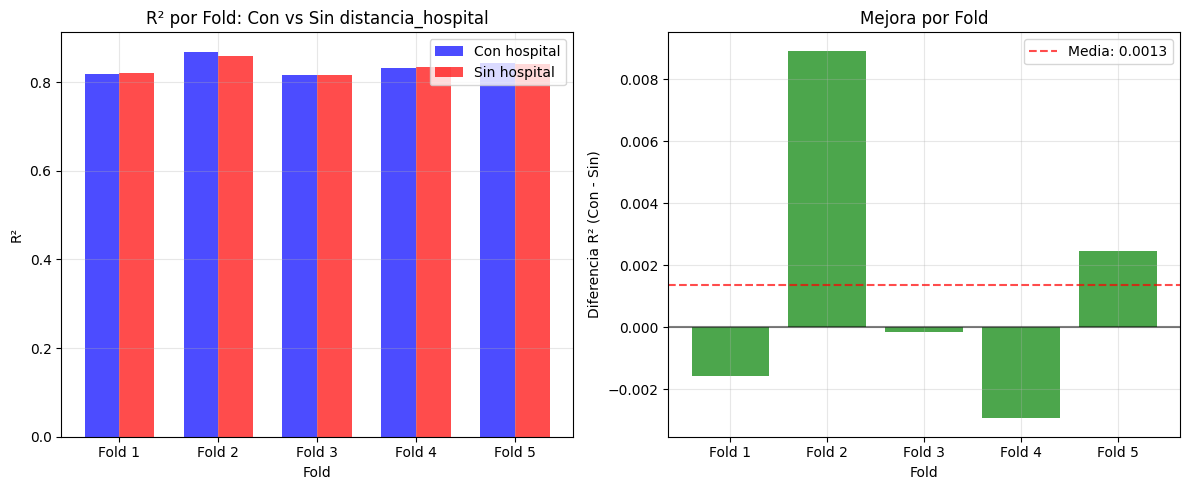

In [33]:
# Obtener nombres de características
feature_names = X.columns.tolist()

# Combinar train y test para CV completo
X_all = np.vstack([X_train_scaled, X_test_scaled])
y_all = torch.cat([y_train_tensor, y_test_tensor])

# Ejecutar análisis con CV
cv_results = hospital_cv_comparison(
    X_scaled=X_all,
    y_tensor=y_all,
    model_class=HousePriceNN,
    feature_names=feature_names,
    cv_folds=5,
    epochs=50
)